In [1]:
!nvidia-smi

Tue Jan  4 08:27:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

importing libraries

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

load the dataset

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

Naming all the classes

In [8]:
classes = ['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
classes[y_train[20][0]]

'deer'

Visualising the data

Enter the number65
automobile


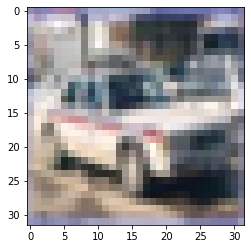

In [10]:
number = int(input("Enter the number"))
plt.imshow(x_train[number])
print(classes[y_train[number][0]])

Normalizing the image

In [11]:
x_train , x_test = x_train/255 , x_test/255

Build the model

In [26]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(20,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

#2nd convolution layer
model.add(Conv2D(40,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

#3rd convolution layer
model.add(Conv2D(80,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

#flatten the image
model.add(Flatten())

#create the ann
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='sigmoid'))
model.add(Dense(25,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='sparse_categorical_accuracy')

In [28]:
model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
1250/1250 [==============================] - 24s 18ms/step - loss: 1.8144 - sparse_categorical_accuracy: 0.3228 - val_loss: 1.5248 - val_sparse_categorical_accuracy: 0.4462
Epoch 2/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.4574 - sparse_categorical_accuracy: 0.4688 - val_loss: 1.3442 - val_sparse_categorical_accuracy: 0.5099
Epoch 3/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3242 - sparse_categorical_accuracy: 0.5194 - val_loss: 1.2389 - val_sparse_categorical_accuracy: 0.5528
Epoch 4/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.2476 - sparse_categorical_accuracy: 0.5492 - val_loss: 1.1464 - val_sparse_categorical_accuracy: 0.5961
Epoch 5/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1905 - sparse_categorical_accuracy: 0.5731 - val_loss: 1.1274 - val_sparse_categorical_accuracy: 0.6078
Epoch 6/100
1250/1250 [==============================] - 10s 8ms/step - loss: 1.1

In [29]:
model.save('cifar_10.h5')

Evaluating the model

In [30]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7729 - sparse_categorical_accuracy: 0.7430


[0.7729449272155762, 0.7429999709129333]

Prediction

In [31]:
y_pred = model.predict(x_test)

predicting the test data

In [37]:
classes[y_pred[10].argmax(axis=0)]

'aeroplane'

actual output

In [38]:
classes[y_test[10].argmax(axis=0)]

'aeroplane'